In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as json
from functools import reduce
import glob, os, json

from numpy import ndarray
from pandas import DataFrame
from Handler import Dataset, f1_metric, make_dataset
from models_tf import *
import tensorflow as tf
from keras.utils.np_utils import to_categorical

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


%matplotlib inline

In [62]:
window_time = 0.5
train_df = Dataset(is_train=True, window_time=window_time)
test_df = Dataset(is_train=False, window_time=window_time)

In [63]:
train_df.x[0]

array([[-2.1619642e+00,  9.4427320e+00,  6.0573304e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.1787236e+00,  9.4259720e+00,  6.3206923e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.2146366e+00,  9.4379430e+00,  6.2488663e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.2290018e+00,  9.4547020e+00,  5.9376204e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.2673090e+00,  9.4930100e+00,  5.5306060e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.3151930e+00,  9.5193460e+00,  5.1714754e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.3702598e+00,  9.5528650e+00,  4.6686932e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.4109612e+00,  9.5624420e+00,  4.5250413e-01, -2.3945917e-01,
        -1.5332718e-01,  2.4495697e-01],
       [-2.4588451e+00,  9.5768070e+00,  4.2856210e-01, -2.3945917e-01,
        -1.5332718e-01, 

In [64]:
train_df.df

,timestamp,id,acc_gx,acc_gy,acc_gz,gyr_gx,gyr_gy,gyr_gz
0,0,0,-2.161964,9.442732,0.605733,-0.239459,-0.153327,0.244957
1,5035319,0,-2.178724,9.425972,0.632069,-0.239459,-0.153327,0.244957
2,10070637,0,-2.214637,9.437943,0.624887,-0.239459,-0.153327,0.244957
3,15105956,0,-2.229002,9.454702,0.593762,-0.239459,-0.153327,0.244957
4,20110756,0,-2.267309,9.493010,0.553061,-0.239459,-0.153327,0.244957
...,...,...,...,...,...,...,...,...
3895,19586119366,72,-6.423643,-5.018247,-1.194707,-1.513113,4.639522,6.836804
3896,19591154694,72,-6.902483,-5.901707,-1.690306,-1.624291,5.223509,6.888727
3897,19596190022,72,-8.267179,-7.362170,-2.571372,-1.728138,5.747020,6.913162
3898,19601225350,72,-9.483433,-9.045294,-4.259285,-1.879021,6.321845,6.910718


In [65]:
train_df.x.shape

(2847, 100, 6)

In [66]:
train_df.x_feature.shape

(2847, 42)

In [67]:
train_df.x_feature

array([[ 0.0783896 , -2.38244622, -2.1619642 , ...,  0.89564316,
        -0.99229489, -0.86011392],
       [ 0.88011992, -3.66013584, -2.3175871 , ..., -0.69518533,
        -0.07365512,  0.03144539],
       [ 2.59780107, -9.62603157, -4.4005427 , ..., -0.4801108 ,
        -0.59949873, -0.16086879],
       ...,
       [ 2.74056135, -2.26742872,  1.5059528 , ..., -0.1821424 ,
        -0.39317738,  0.92683042],
       [ 5.37235494,  2.503497  , 21.363462  , ...,  0.39768316,
         0.69952914,  0.28518008],
       [ 8.38709349, 11.43181036, 23.417686  , ..., -0.70981429,
        -0.86951927,  0.52034116]])

In [68]:
train_df.y_feature

array([0, 0, 0, ..., 4, 4, 4])

In [69]:
lr_list = [0.025,0.05, 0.075, 0.1,  0.5, 0.75, 1, 0.25,]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(train_df.x_feature, train_df.y_feature)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(train_df.x_feature, train_df.y_feature)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(test_df.x_feature, test_df.y_feature)))

Learning rate:  0.025
Accuracy score (training): 0.904
Accuracy score (validation): 0.607
Learning rate:  0.05
Accuracy score (training): 0.921
Accuracy score (validation): 0.650
Learning rate:  0.075
Accuracy score (training): 0.932
Accuracy score (validation): 0.680
Learning rate:  0.1
Accuracy score (training): 0.936
Accuracy score (validation): 0.668
Learning rate:  0.5
Accuracy score (training): 0.978
Accuracy score (validation): 0.707
Learning rate:  0.75
Accuracy score (training): 0.988
Accuracy score (validation): 0.710
Learning rate:  1
Accuracy score (training): 0.991
Accuracy score (validation): 0.722
Learning rate:  0.25
Accuracy score (training): 0.958
Accuracy score (validation): 0.662


In [70]:
ytest_pr = gb_clf.predict(test_df.x_feature)
print(classification_report(test_df.y_feature, ytest_pr))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64        78
           1       0.79      0.26      0.39        58
           2       0.97      0.97      0.97        78
           3       0.45      0.85      0.58        39
           4       0.62      0.51      0.56        78

    accuracy                           0.66       331
   macro avg       0.68      0.66      0.63       331
weighted avg       0.70      0.66      0.65       331



In [71]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_df.x_feature, train_df.y_feature)

score = xgb_clf.score(test_df.x_feature, test_df.y_feature)
print(score)

0.824773413897281


In [72]:
ytest_pr = xgb_clf.predict(test_df.x_feature)
print(classification_report(test_df.y_feature, ytest_pr))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        78
           1       0.77      0.52      0.62        58
           2       0.99      0.95      0.97        78
           3       0.72      0.92      0.81        39
           4       0.69      0.81      0.75        78

    accuracy                           0.82       331
   macro avg       0.82      0.82      0.81       331
weighted avg       0.83      0.82      0.82       331



In [73]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30)

clf.fit(train_df.x_feature, train_df.y_feature)

score = clf.score(test_df.x_feature, test_df.y_feature)
print(score)

0.8157099697885196


In [74]:
ytest_pr = clf.predict(test_df.x_feature)
print(classification_report(test_df.y_feature, ytest_pr))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        78
           1       0.73      0.38      0.50        58
           2       1.00      0.96      0.98        78
           3       0.58      0.82      0.68        39
           4       0.76      0.83      0.80        78

    accuracy                           0.82       331
   macro avg       0.79      0.79      0.78       331
weighted avg       0.82      0.82      0.81       331



In [75]:
from sklearn import svm

clf2 = svm.LinearSVC(random_state=0)
clf2.fit(train_df.x_feature, train_df.y_feature)
print("Accuracy on training set is : {}".format(clf2.score(train_df.x_feature, train_df.y_feature)))
print("Accuracy on test set is : {}".format(clf2.score(test_df.x_feature, test_df.y_feature)))

Accuracy on training set is : 0.9490691956445381
Accuracy on test set is : 0.6737160120845922


C:\Users\Aioki\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [76]:
ytest_pr = clf2.predict(test_df.x_feature)
print(classification_report(test_df.y_feature, ytest_pr))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        78
           1       0.38      0.36      0.37        58
           2       0.96      0.95      0.95        78
           3       0.55      0.85      0.67        39
           4       0.57      0.50      0.53        78

    accuracy                           0.67       331
   macro avg       0.65      0.67      0.66       331
weighted avg       0.68      0.67      0.67       331



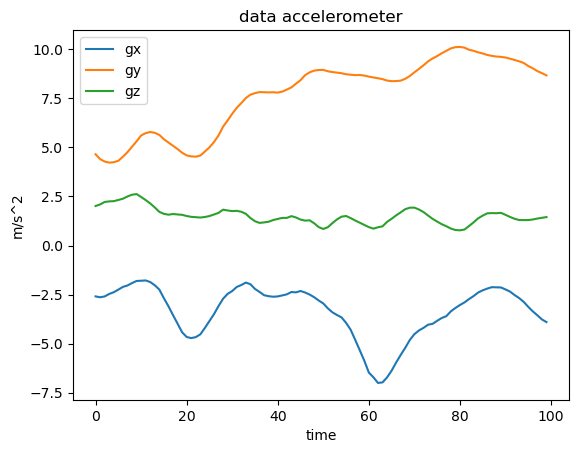

In [77]:
def plot_acc(data):
    plt.plot(data[:,0])
    plt.plot(data[:,1])
    plt.plot(data[:,2])
    plt.title(f'data accelerometer')
    plt.xlabel('time')
    plt.ylabel(f'm/s^2')
    plt.legend(['gx', 'gy', 'gz'], loc='upper left')

def plot_gyr(data):
    plt.plot(data[:,3])
    plt.plot(data[:,4])
    plt.plot(data[:,5])
    plt.title(f'data gyroscope')
    plt.xlabel('time')
    plt.ylabel(f'rad/s')
    plt.legend(['gx', 'gy', 'gz'], loc='upper left')

plot_acc(train_df.x[4])

[0. 1. 0. 0. 0.]


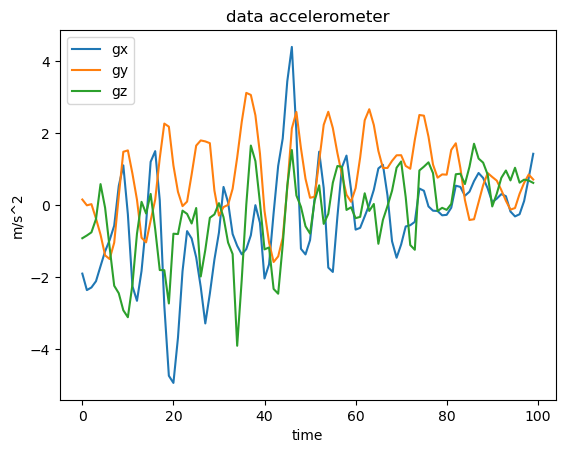

In [78]:
index = 10

plot_acc(test_df.x[index])
print(test_df.y[index])

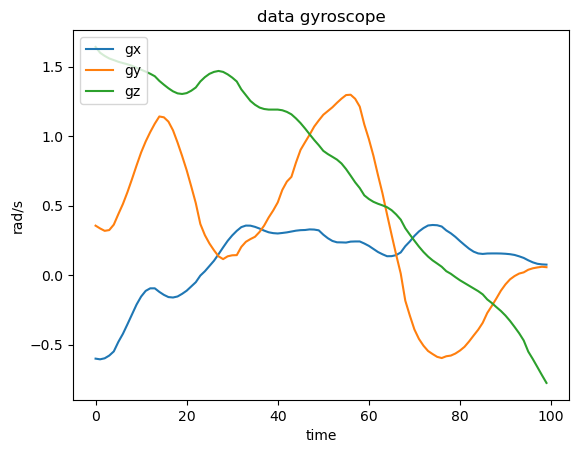

In [79]:
plot_gyr(train_df.x[4])

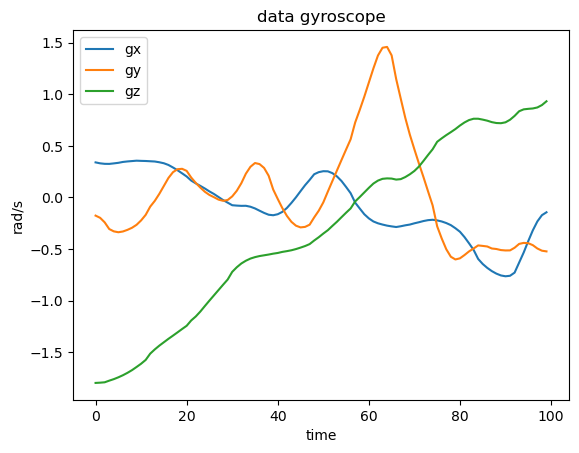

In [80]:
plot_gyr(train_df.x[6])